<a href="https://colab.research.google.com/github/abhijain864/Project_Principal-Component-Analysis/blob/main/Olivetti_face_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orthogonal Projections

We will write functions that will implement orthogonal projections.

## Learning objectives

1. Write code that projects data onto lower-dimensional subspaces.
2. Understand the real world applications of projections.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


As always, we will first import the packages that we need for this assignment.

In [2]:
# PACKAGE: DO NOT EDIT THIS CELL
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

Next, we will retrieve the Olivetti faces dataset.

In [3]:
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people
from ipywidgets import interact
%matplotlib inline
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces('./')
faces = dataset.data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to ./


### Advice for testing numerical algorithms
Before we begin this week's assignment, there are some advice that we would like to give for writing functions that work with numerical data. They are useful for finding bugs in your implementation.

Testing machine learning algorithms (or numerical algorithms in general)
is sometimes really hard as it depends on the dataset
to produce an answer, and you will never be able to test your algorithm on all the datasets
we have in the world. Nevertheless, we have some tips for you to help you identify bugs in
your implementations.

#### 1. Test on small dataset
Test your algorithms on small dataset: datasets of size 1 or 2 sometimes will suffice. This
is useful because you can (if necessary) compute the answers by hand and compare them with
the answers produced by the computer program you wrote. In fact, these small datasets can even have special numbers,
which will allow you to compute the answers by hand easily.

#### 2. Find invariants
Invariants refer to properties of your algorithm and functions that are maintained regardless
of the input. We will highlight this point later in this notebook where you will see functions,
which will check invariants for some of the answers you produce.

Invariants you may want to look for:
1. Does your algorithm always produce a positive/negative answer, or a positive definite matrix?
2. If the algorithm is iterative, do the intermediate results increase/decrease monotonically?
3. Does your solution relate with your input in some interesting way, e.g. orthogonality? 

Finding invariants is hard, and sometimes there simply isn't any invariant. However, DO take advantage of them if you can find them. They are the most powerful checks when you have them.

We can find some invariants for projections. In the cell below, we have written two functions which check for invariants of projections. See the docstrings which explain what each of them does. You should use these functions to test your code.

In [4]:
import numpy.testing as np_test
def test_property_projection_matrix(P):
    """Test if the projection matrix satisfies certain properties.
    In particular, we should have P @ P = P, and P = P^T
    """
    np_test.assert_almost_equal(P, P @ P)
    np_test.assert_almost_equal(P, P.T)

def test_property_projection(x, p):
    """Test orthogonality of x and its projection p."""
    np_test.assert_almost_equal(p.T @ (p-x), 0)

## 1. Orthogonal Projections

Recall that for projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$


Your task is to implement orthogonal projections. We can split this into two steps
1. Find the projection matrix $\boldsymbol P$ that projects any $\boldsymbol x$ onto $U$.
2. The projected vector $\pi_U(\boldsymbol x)$ of $\boldsymbol x$ can then be written as $\pi_U(\boldsymbol x) = \boldsymbol P\boldsymbol x$.

To perform step 1, you need to complete the function `projection_matrix_1d` and `projection_matrix_general`. To perform step 2, complete `project_1d` and `project_general`.

In [5]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

# Projection 1d

# ===YOU SHOULD EDIT THIS FUNCTION===
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D, 1), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    D, _ = b.shape
    ### Edit the code below to compute a projection matrix of shape (D,D) # <-- EDIT THIS
    P = (np.dot(b,b.T)/np.sum(b*b))
    return P
    ###

# ===YOU SHOULD EDIT THIS FUNCTION===
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D, 1), the basis for the subspace
    
    Returns:
        y: ndarray of shape (D, 1) projection of x in space spanned by b
    """
    p = np.dot(projection_matrix_1d(b),x) # <-- EDIT THIS
    return p

# Projection onto a general (higher-dimensional) subspace
# ===YOU SHOULD EDIT THIS FUNCTION===
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = B @ np.linalg.inv(B.T @ B) @ B.T # <-- EDIT THIS
    return P

# ===YOU SHOULD EDIT THIS FUNCTION===
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        x: ndarray of dimension (D, 1), the vector to be projected
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        p: projection of x onto the subspac spanned by the columns of B; size (D, 1)
    """
    p = projection_matrix_general(B) @ x # <-- EDIT THIS
    return p

We have included some unittest for you to test your implementation.

In [6]:
# Orthogonal projection in 2d
# define basis vector for subspace
b = np.array([2,1]).reshape(-1, 1)
# point to be projected later
x = np.array([1,2]).reshape(-1, 1)

Remember our discussion earlier about invariants? In the next cell, we will check that these invariants hold for the functions that you have implemented earlier.

In [7]:
# Test 1D
# Test that we computed the correct projection matrix
np_test.assert_almost_equal(projection_matrix_1d(np.array([1, 2, 2]).reshape(-1,1)), 
                            np.array([[1,  2,  2],
                                      [2,  4,  4],
                                      [2,  4,  4]]) / 9)

# Test that we project x on to the 1d subspace correctly
np_test.assert_almost_equal(project_1d(np.ones((3,1)),
                                       np.array([1, 2, 2]).reshape(-1,1)),
                            np.array([5, 10, 10]).reshape(-1,1) / 9)

B = np.array([[1, 0],
              [1, 1],
              [1, 2]])

# Test 2D
# Test that we computed the correct projection matrix
np_test.assert_almost_equal(projection_matrix_general(B), 
                            np.array([[5,  2, -1],
                                      [2,  2,  2],
                                      [-1, 2,  5]]) / 6)

# Test that we project x on to the 2d subspace correctly
np_test.assert_almost_equal(project_general(np.array([6, 0, 0]).reshape(-1,1), B), 
                            np.array([5, 2, -1]).reshape(-1,1))

It is always good practice to create your own test cases. Create some test
cases of your own below!

In [8]:
# Write your own test cases here, use random inputs, utilize the invariants we have!

## 2. Eigenfaces

Next, we will take a look at what happens if we project some dataset consisting of human faces onto some basis we call
the "eigenfaces". You do not need to know what `eigenfaces` are for now but you will know what they are towards the end of the course!

As always, let's import the packages that we need.

In [9]:
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people
from ipywidgets import interact
%matplotlib inline
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces('./')
faces = dataset.data

In [10]:
faces.shape

(400, 4096)

#Let's visualize the dataset.

In [11]:
array = np.zeros((20*64,20*64))
count= 0
for i in range(20):
  for j in range(20):
    array[i*64:(i+1)*64,j*64:(j+1)*64] = faces[count].reshape(64,64)
    count=count+1

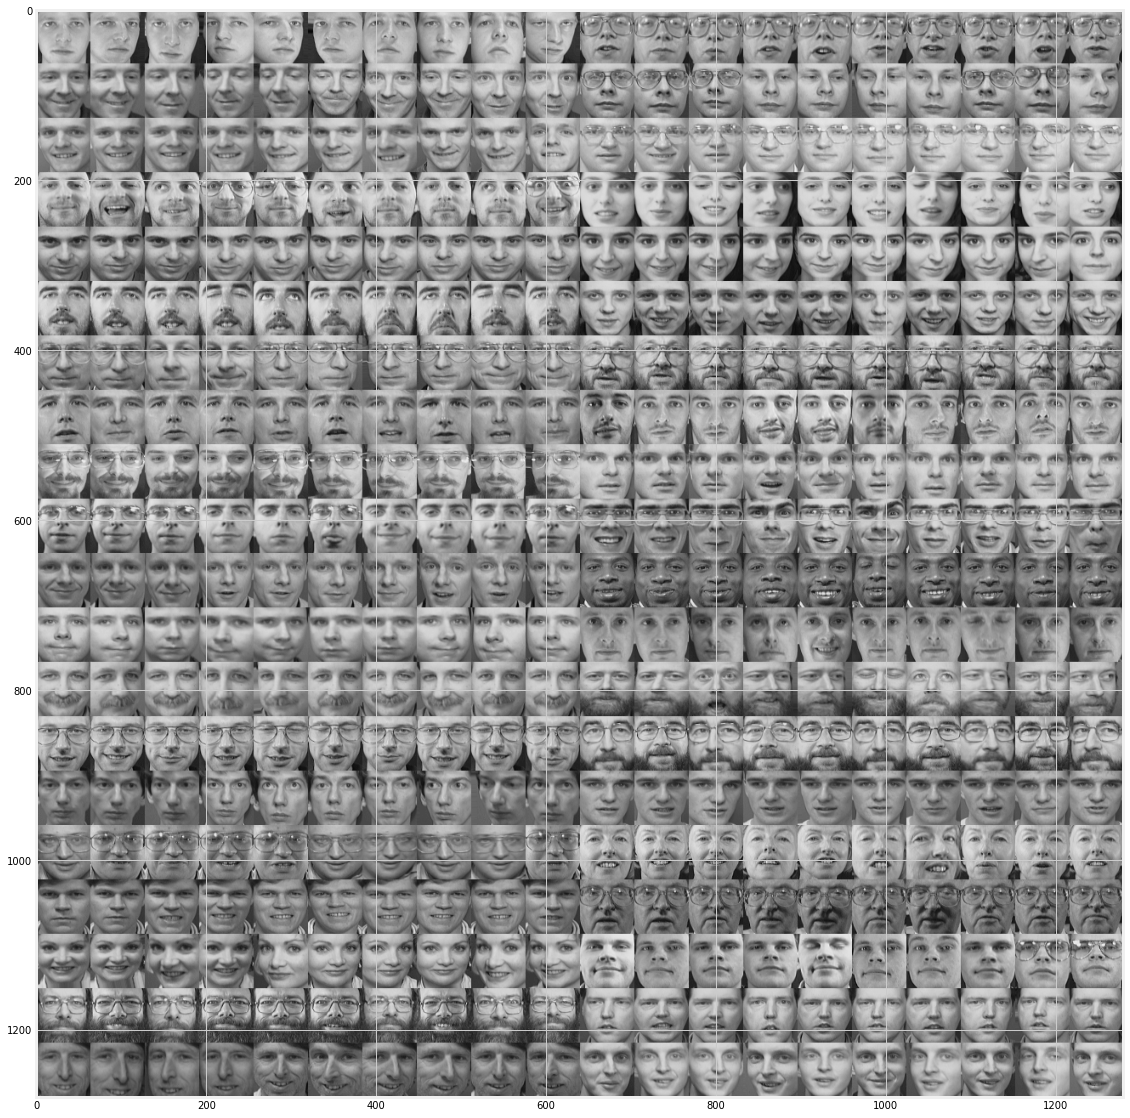

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(array,cmap='gray')

Let's take a set of 5 images

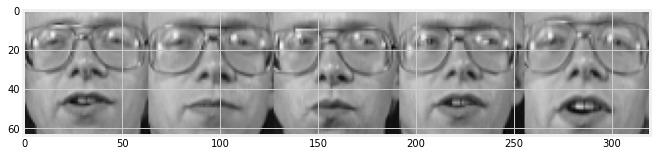

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(faces[10:15].reshape(5,64,64)), cmap='gray');

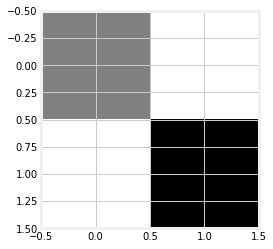

In [14]:
# For a grayscale images, the pixel value is a single number that represents the brightness of the pixel.
plt.imshow([[0.5,1],[1,0]],cmap='gray')

In [15]:
# for numerical reasons we normalize the dataset
mean = faces.mean(axis=0)
print('mean size is ',mean.size)
std = faces.std(axis=0)
print('std size is ',std.size)
faces_normalized = (faces - mean) / std

mean size is  4096
std size is  4096


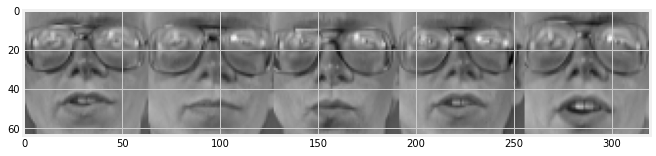

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(faces_normalized[10:15].reshape(5,64,64)), cmap='gray');

The data for the basis has been saved in a file named `eigenfaces.npy`, first we load it into the variable B.

In [18]:
def eig(S):
    (val, vec) = np.linalg.eig(S)
    vec = vec.T
    vec = vec[np.argsort(val)[::-1]]
    val = np.sort(val)[::-1]
    return (val,vec) # <-- EDIT THIS to return the eigenvalues and corresponding eigenvectors


In [51]:
def basis_gen(X, n_components):
    new = np.dot(X,X.T)
    val,vec = eig(new)
    Basis = vec[:n_components].T
    B = np.dot(X.T,Basis)
    mag = np.sqrt(np.sum(B*B,axis=0))
    B=B/mag
    return B # <-- EDIT THIS to return the reconstruction of X

In [29]:
%cd /content/drive/MyDrive/projects/PCA
B = np.load('eigenfaces.npy') # we use the first 50 basis vectors --- you should play around with this.
print("the eigenfaces have shape {}".format(B.shape))

/content/drive/MyDrive/projects/PCA
the eigenfaces have shape (100, 64, 64)


In [48]:
# basis , reconstruction = basis_gen(faces_normalized.T,50)
# basis = basis.reshape(50,64,64)

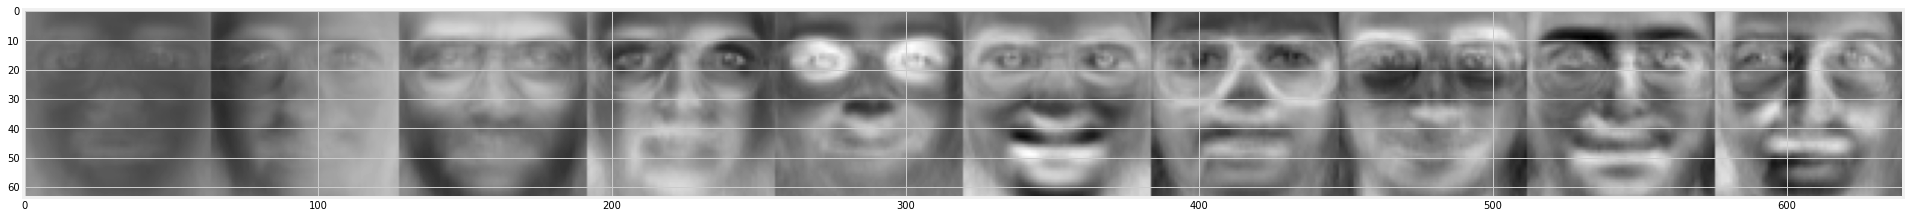

In [21]:
plt.figure(figsize=(30,30))
plt.imshow(np.hstack(B[:10].reshape(-1, 64, 64)), cmap='gray');

Each instance in $\boldsymbol B$ is a `64x64' image, an "eigenface", which we determined using an algorithm called Principal Component Analysis. Let's visualize 
a few of those "eigenfaces".

In [22]:
B = basis_gen(faces_normalized,10)

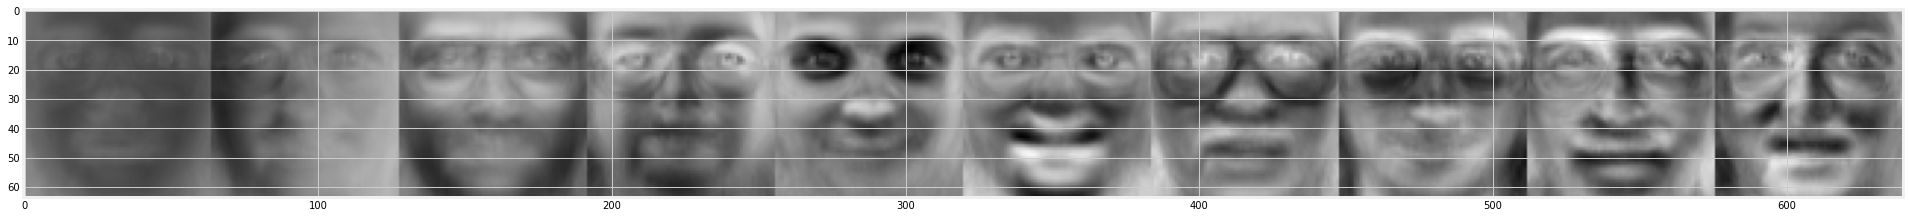

In [24]:
plt.figure(figsize=(30,30))
plt.imshow(np.hstack(B.T[:10].reshape(-1, 64, 64)), cmap='gray');

Take a look at what happens if we project our faces onto the basis $\boldsymbol B$ spanned by these 50 "eigenfaces". In order to do this, we need to reshape $\boldsymbol B$ from above, which is of size (50, 64, 64), into the same shape as the matrix representing the basis as we have done earlier, which is of size (4096, 50). Here 4096 is the dimensionality of the data and 50 is the number of data points. 

Then we can reuse the functions we implemented earlier to compute the projection matrix and the projection. Complete the code below to visualize the reconstructed faces that lie on the subspace spanned by the "eigenfaces".

In [25]:
# EDIT THIS FUNCTION
@interact(i=(0, 30))
def show_face_face_reconstruction(i):
    without_normalized = faces[i].reshape(64,64)
    original_face = faces_normalized[i].reshape(64, 64)
    # reshape the data we loaded in variable `B` 
    # so that we have a matrix representing the basis.
    B = basis_gen(faces_normalized,45).reshape((4096,-1)) # <-- EDIT THIS
    #face_reconstruction = project_general(faces_normalized[i], B_basis).reshape(64, 64)
    face_reconstruction = (B @ B.T @ (faces_normalized[i].reshape(-1,1))).reshape(64,64) 
    plt.figure()
    plt.imshow(np.hstack([without_normalized,original_face, face_reconstruction]), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=15, description='i', max=30), Output()), _dom_classes=('widget-interact'…